In [62]:
import os

Load filenames

In [63]:
train_path = "../../dataset/brain/singlecoil_train/"
val_path = "../../dataset/brain/singlecoil_val/"

with os.scandir(train_path) as entries:
    train_list = [entry.name for entry in entries if entry.is_file()]

with os.scandir(val_path) as entries:
    val_list = [entry.name for entry in entries if entry.is_file()]


imports

In [64]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

Opening one of the 5p file, keys are: <KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']>

In [65]:

hf = h5py.File(train_path + train_list[0], 'r')
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']
Attrs: {}


Function to display a number of slices at once

In [66]:
def show_slices(data, slices, cmap='gray'):
    fig = plt.figure()
    for i, num in enumerate(slices):
        plt.subplot(1, len(slices), i + 1)
        plt.imshow(data[num], cmap=cmap)



Show kspace

complex128
(16, 640, 320)


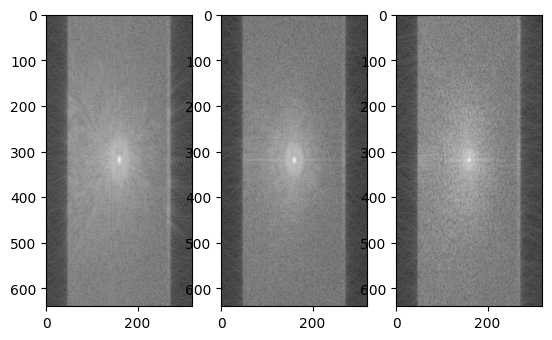

In [67]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

show_slices(np.log(np.abs(volume_kspace) + 1e-9), [0, 5, 10])  # This shows slices 0, 5 and 10, convert complex to real number with log of abs

In [68]:
import fastmri
from fastmri.data import transforms as T

Convert to image

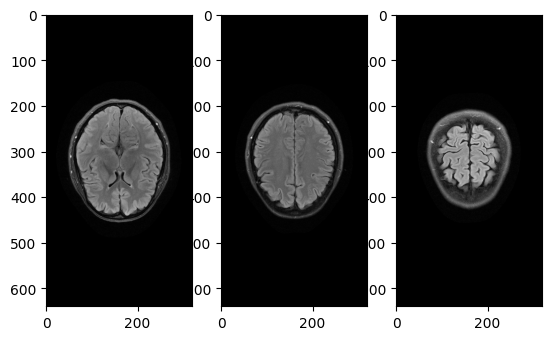

In [69]:
vol_kspace2 = T.to_tensor(volume_kspace)      # Convert from numpy array to pytorch tensor
vol_image = fastmri.ifft2c(vol_kspace2)           # Apply Inverse Fourier Transform to get the complex image
vol_image_abs = fastmri.complex_abs(vol_image)   # Compute absolute value to get a real image

show_slices(vol_image_abs, [0, 5, 10], cmap='gray')

Now we want to undersample the data

In [70]:
from fastmri.data.subsample import RandomMaskFunc

mask_func = RandomMaskFunc(center_fractions=[0.1], accelerations=[8])
masked_kspace, mask, _ = T.apply_mask(vol_kspace2, mask_func)

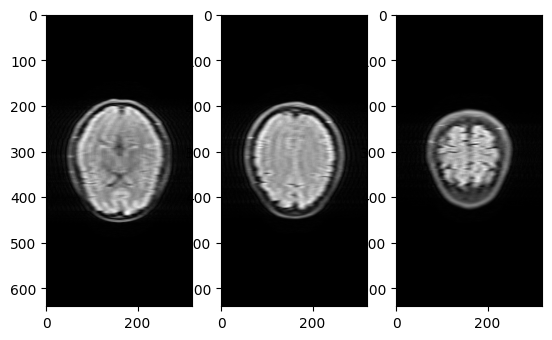

In [71]:
vol_image_undersampled = fastmri.ifft2c(masked_kspace)           # Apply Inverse Fourier Transform to get the complex image
vol_image_abs_undersampled = fastmri.complex_abs(vol_image_undersampled)   # Compute absolute value to get a real image

show_slices(vol_image_abs_undersampled, [0, 5, 10], cmap='gray')

Display images in maximal resolution

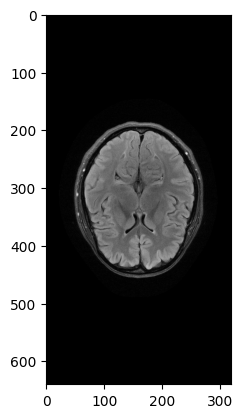

In [74]:
plt.imshow(vol_image_abs[0], cmap='gray')

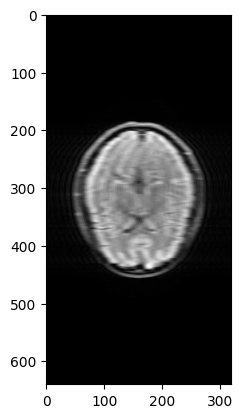

In [75]:
plt.imshow(vol_image_abs_undersampled[0], cmap='gray')